In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from autoencoder1 import autoencoder
import torch 
import torch.nn as nn
from torch.autograd import Variable
from torchsummary import summary
#from torch.utils.data import DataLoader
#from torchvision import transforms
#from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(1)

dTrain1 = sio.loadmat('Train_1_Correct_PPG1_TimeDist3.mat')
dTrain2 = sio.loadmat('Train_1_Correct_PPG2_TimeDist3.mat')

In [3]:
heartTrain = (dTrain1['Hr_train1'] - 50) / 150

signalTrain1 = dTrain1['Train1']
signalTrain2 = dTrain2['Train2']

s1 = signalTrain1.shape
signalTrain = np.zeros((s1[0], s1[1], s1[2], 2))

signalTrain[:, :, :, 0] = signalTrain1
signalTrain[:, :, :, 1] = signalTrain2

print('Shape of signalTrain1: ' + str(signalTrain1.shape))
print('Shape of signalTrain2 ' + str(signalTrain2.shape))
print('Shape of signalTrain: ' + str(signalTrain.shape))
print('Shape of heartTrain: ' + str(heartTrain.shape))

Shape of signalTrain1: (6716, 3, 1200)
Shape of signalTrain2 (6716, 3, 1200)
Shape of signalTrain: (6716, 3, 1200, 2)
Shape of heartTrain: (6716, 1)


In [4]:
#plt.plot(range(1200), signalTrain[10,2,:,1])

In [5]:
np.random.seed(1)

dTest1 = sio.loadmat('Test_1_Correct_PPG1_TimeDist3.mat')
dTest2 = sio.loadmat('Test_1_Correct_PPG2_TimeDist3.mat')

In [6]:
heartTestA = (dTest1['Hr_testA1'] - 50) / 150

signalTestA1 = dTest1['TestA1']
signalTestA2 = dTest2['TestA2']

s2 = signalTestA1.shape
signalTestA = np.zeros((s2[0], s2[1], s2[2], 2))

signalTestA[:, :, :, 0] = signalTestA1
signalTestA[:, :, :, 1] = signalTestA2

print('Shape of signalTestA1: ' + str(signalTestA1.shape))
print('Shape of signalTestA2: ' + str(signalTestA2.shape))
print('Shape of signalTestA: ' + str(signalTestA.shape))
print('Shape of heartTestA: ' + str(heartTestA.shape))

Shape of signalTestA1: (230, 3, 1200)
Shape of signalTestA2: (230, 3, 1200)
Shape of signalTestA: (230, 3, 1200, 2)
Shape of heartTestA: (230, 1)


In [7]:
np.random.seed(1)

dTest1 = sio.loadmat('Low_1_Correct_PPG1_TimeDist3.mat')
dTest2 = sio.loadmat('Low_1_Correct_PPG2_TimeDist3.mat')

In [8]:
heartTestB = (dTest1['Hr_testA1'] - 50) / 150

signalTestB1 = dTest1['TestA1']
signalTestB2 = dTest2['TestA2']

s3 = signalTestB1.shape
signalTestB = np.zeros((s3[0], s3[1], s3[2], 2))

signalTestB[:, :, :, 0] = signalTestB1
signalTestB[:, :, :, 1] = signalTestB2

print('Shape of signalTestB1: ' + str(signalTestB1.shape))
print('Shape of signalTestB2: ' + str(signalTestB2.shape))
print('Shape of signalTestB: ' + str(signalTestB.shape))
print('Shape of heartTestB: ' + str(heartTestB.shape))

Shape of signalTestB1: (230, 3, 1200)
Shape of signalTestB2: (230, 3, 1200)
Shape of signalTestB: (230, 3, 1200, 2)
Shape of heartTestB: (230, 1)


In [57]:
X_train = signalTrain[:, 2, :, :]
Y_train = heartTrain
X_test1 = signalTestA[:, 2, :, :]
Y_test1 = heartTestA
X_test2 = signalTestB[:, 2, :, :]
Y_test2 = heartTestB

In [58]:
X_test1.shape

(230, 1200, 2)

In [59]:
def normali(input):
    tem = input[:, :, 0]
    tem = tem/np.dot((np.max(tem, axis=1, keepdims=True)-np.min(tem, axis=1, keepdims=True)), np.ones((1, 1200)))
    input[:, :, 0] = tem
    
    tem = input[:, :, 1]
    tem = tem/np.dot((np.max(tem, axis=1, keepdims=True)-np.min(tem, axis=1, keepdims=True)), np.ones((1, 1200)))
    input[:, :, 1] = tem
    
    return input

In [60]:
X_train = normali(X_train).transpose([0, 2, 1])
X_test1 = normali(X_test1).transpose([0, 2, 1])
X_test2 = normali(X_test2).transpose([0, 2, 1])

In [61]:
X_train.shape

(6716, 2, 1200)

In [63]:
#num_input = 439
#plt.plot(range(1200), X_train[num_input, :, 0])
#plt.plot(range(1200), X_train[num_input, :, 1])

In [64]:
num_epochs = 50
batch_size = 128
learning_rate = 1e-3

In [65]:
model = autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), 
                             lr=learning_rate,
                            weight_decay=1e-5)

In [66]:
summary(model, (2, 1200))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1             [-1, 16, 1199]             144
              ReLU-2             [-1, 16, 1199]               0
         MaxPool1d-3              [-1, 16, 599]               0
            Conv1d-4              [-1, 32, 598]           2,080
              ReLU-5              [-1, 32, 598]               0
         MaxPool1d-6              [-1, 32, 299]               0
            Conv1d-7              [-1, 64, 298]           8,256
              ReLU-8              [-1, 64, 298]               0
         MaxPool1d-9              [-1, 64, 149]               0
  ConvTranspose1d-10              [-1, 32, 300]           8,224
             ReLU-11              [-1, 32, 300]               0
  ConvTranspose1d-12              [-1, 16, 602]           2,064
             ReLU-13              [-1, 16, 602]               0
  ConvTranspose1d-14              [-1, 

In [67]:
for name,parameters in model.named_parameters():
    print(name,':',parameters.size())

encoder.0.weight : torch.Size([16, 2, 4])
encoder.0.bias : torch.Size([16])
encoder.3.weight : torch.Size([32, 16, 4])
encoder.3.bias : torch.Size([32])
encoder.6.weight : torch.Size([64, 32, 4])
encoder.6.bias : torch.Size([64])
decoder.0.weight : torch.Size([64, 32, 4])
decoder.0.bias : torch.Size([32])
decoder.2.weight : torch.Size([32, 16, 4])
decoder.2.bias : torch.Size([16])
decoder.4.weight : torch.Size([16, 2, 4])
decoder.4.bias : torch.Size([2])


In [68]:
X_train = torch.from_numpy(X_train)
X_test1 = torch.from_numpy(X_test1)
X_test2 = torch.from_numpy(X_test2)

In [71]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for data in X_train:
        data = Variable(data)#.cuda()
        
        #zero the parameter gradients
        optimizer.zero_grad()
        
        #forward + backward
        output = model(data)
        loss = criterion(output, data)
        loss.backward()
        
        #renew parameter
        optimizer.step()
        
        #print log info
        running_loss += loss.data[0]
    
    print('Epoch NO.' + str(epoch+1) + ' loss: ' + str(running_loss/6716.))
    
print('Finish!')
        
        

RuntimeError: Expected 3-dimensional input for 3-dimensional weight [16, 2, 4], but got input of size [2, 1200] instead

In [23]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

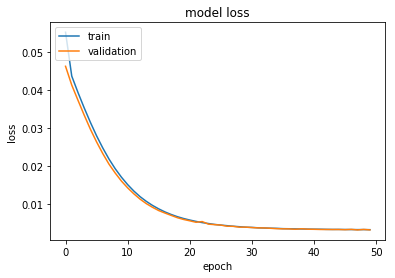

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

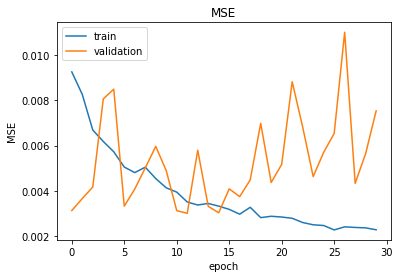

In [26]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

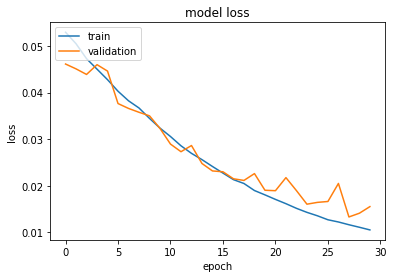

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()